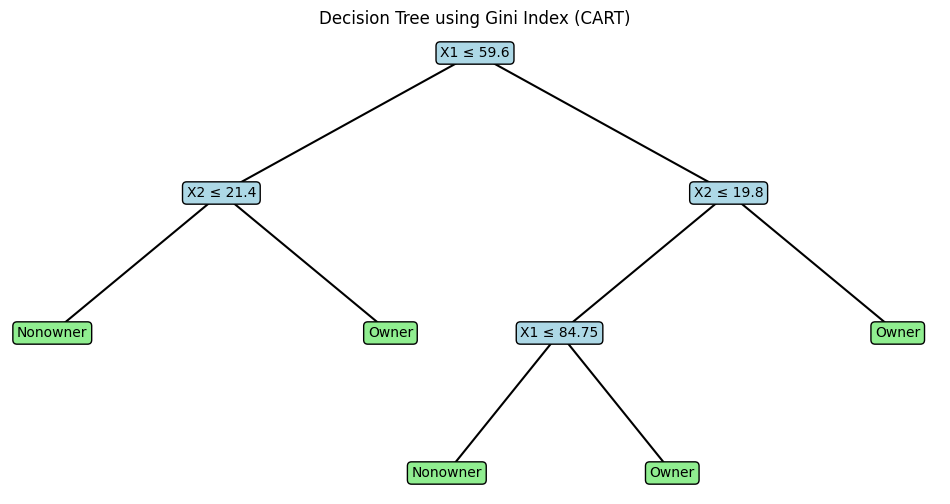

In [ ]:
import pandas as pd

data = {
    "X1": [60,75,85.5,52.8,64.8,64.8,61.5,43.2,87,84,110.1,49.2,108,59.2,82.8,
           66,69,47.4,93,33,51,51,81,63],
    "X2": [18.4,19.6,16.8,20.8,21.6,17.2,20.8,20.4,23.6,17.6,19.2,17.6,
           17.6,16,22.4,18.4,20,16.4,20.8,18.8,22,14,20,14.8],
    "Class": ["Owner","Nonowner","Owner","Nonowner","Owner","Nonowner","Owner","Nonowner",
              "Owner","Nonowner","Owner","Nonowner","Owner","Nonowner","Owner","Nonowner",
              "Owner","Nonowner","Owner","Nonowner","Owner","Nonowner","Owner","Nonowner"]
}

df = pd.DataFrame(data)

def gini(groups):
    total = sum(len(g) for g in groups)
    gini_val = 0
    for g in groups:
        size = len(g)
        if size == 0:
            continue
        probs = g["Class"].value_counts(normalize=True)
        score = sum(p*p for p in probs)
        gini_val += (1 - score) * (size / total)
    return gini_val


def best_split(data):
    best_f, best_v, best_g = None, None, 1
    for f in ["X1", "X2"]:
        vals = sorted(data[f].unique())
        for i in range(len(vals)-1):
            split = (vals[i] + vals[i+1]) / 2
            left = data[data[f] <= split]
            right = data[data[f] > split]
            g = gini([left, right])
            if g < best_g:
                best_f, best_v, best_g = f, split, g
    return best_f, best_v


def leaf(data):
    return data["Class"].mode()[0]


def build_tree(data, depth=0, max_depth=3):
    if len(data["Class"].unique()) == 1:
        return data["Class"].iloc[0]

    if depth == max_depth:
        return leaf(data)

    feature, value = best_split(data)
    if feature is None:
        return leaf(data)

    left = data[data[feature] <= value]
    right = data[data[feature] > value]

    return {
        f"{feature} ≤ {round(value,2)}": {
            "Yes": build_tree(left, depth+1),
            "No": build_tree(right, depth+1)
        }
    }


tree = build_tree(df)


import matplotlib.pyplot as plt

def draw_tree(tree, x=0.5, y=1.0, dx=0.2, dy=0.15):
    if not isinstance(tree, dict):
        plt.text(x, y, tree, ha='center', va='center',
                 bbox=dict(boxstyle="round", fc="lightgreen"))
        return

    root = list(tree.keys())[0]
    children = tree[root]

    plt.text(x, y, root, ha='center', va='center',
             bbox=dict(boxstyle="round", fc="lightblue"))

    left_x = x - dx
    right_x = x + dx
    child_y = y - dy

    plt.plot([x, left_x], [y, child_y], 'k-')
    plt.plot([x, right_x], [y, child_y], 'k-')

    draw_tree(children["Yes"], left_x, child_y, dx/1.5, dy)
    draw_tree(children["No"], right_x, child_y, dx/1.5, dy)


plt.figure(figsize=(12, 6))
draw_tree(tree)
plt.axis('off')
plt.title("Decision Tree using Gini Index (CART)")
plt.show()

